## Intermediate Machine Learning: Assignment 1

**Deadline**

Assignment 1 is due Wednesday, September 25 11:59 pm. Late work will not be accepted as per the course policies (see the syllabus on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Acknowledge any use of an AI system such as ChatGPT or Copilot.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission**

Submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:

Go to "File" at the top-left of your Jupyter Notebook
Under "Download as", select "HTML (.html)"
After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
From the print window, select the option to save as a .pdf

**Topics**

 * Lasso
 * Bias-variance decomposition
 * Mercer kernels
 * LOOCV for kernel smoothing and ridge regression

This assignment will also help to solidify your Python and Jupyter notebook skills.


### Problem 1: Roping variables with the lasso (15 points)

In this exercise, we'll employ the lasso regression technique to identify key predictor variables from the diabetes dataset. This dataset has its origins in the National Institute of Diabetes and Digestive and Kidney Diseases. The primary goal is to predict, based on diagnostic measurements, whether or not a patient has diabetes.

To provide context, the dataset focuses on a very specific population: all female patients, aged 21 and above, of Pima Indian descent.

**Dataset Features**:

* **Pregnancies**: Number of times pregnant 
* **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Thickness of triceps skin fold (mm)
* **Insulin**: 2-hour serum insulin level (mu U/ml)
* **BMI**: Body mass index (calculated as weight in kg divided by height in m squared)
* **DiabetesPedigreeFunction**: A function that scores likelihood of diabetes based on family history
* **Age**: Age in years
* **Outcome**: The target variable, indicating presence (1) or absence (0) of diabetes

**Your tasks are as follows**:

1. **Plotting Lasso Paths**: Generate a visualization of the lasso regularization paths.
2. **Identifying Key Predictors**: Determine which coefficients of \( \beta \) are non-zero.
3. **Estimating Coefficients**: Provide the best estimate for these non-zero coefficients.


In [6]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.linear_model import Lasso

%matplotlib inline

Just run the next cell to read in the data.

In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/YData123/sds365-fa23/main/assignments/assn1/diabetes.csv')
X = np.array(df.iloc[:,:8])
y = np.array(df.iloc[:,-1])
n, p = X.shape
print("Number of rows: {}".format(n))
print("Number of columns: {}".format(p))

Number of rows: 768
Number of columns: 8


### 1.1: Lasso regularization paths

Run the lasso and plot the regularization paths. You can use the `Lasso` class from the `sklearn.linear_model` package. Plot the parameter paths with the regularization level $\lambda$ (`alpha` in the code) on the log-scale, as done in the lasso demo code from class. (As always, be sure to label your axes.)

Show two plots, one where you run the lasso on the variables as given in the dataset, another where you standardize the variables to have mean zero and standard deviation one. Describe the differences in the regularization paths, and explain those differences.

When the predictors are standardized, what order do they appear in the lasso fits? That is, as $\lambda$ decreases from infinity to zero, what is the sequence of variables that enter the model with nonzero coefficients? Explain why this ordering may (or may not) make sense.



#### No Standardize

In [62]:
# Parameters
alphas = np.linspace(0.01,1,10000)

In [63]:
# Collect coefficients
coef_collect = []
for alpha in tqdm(alphas, desc='Alpha'):
    model = Lasso(alpha=alpha).fit(X, y)
    coef_collect.append(model.coef_)

Alpha:   0%|          | 0/10000 [00:00<?, ?it/s]

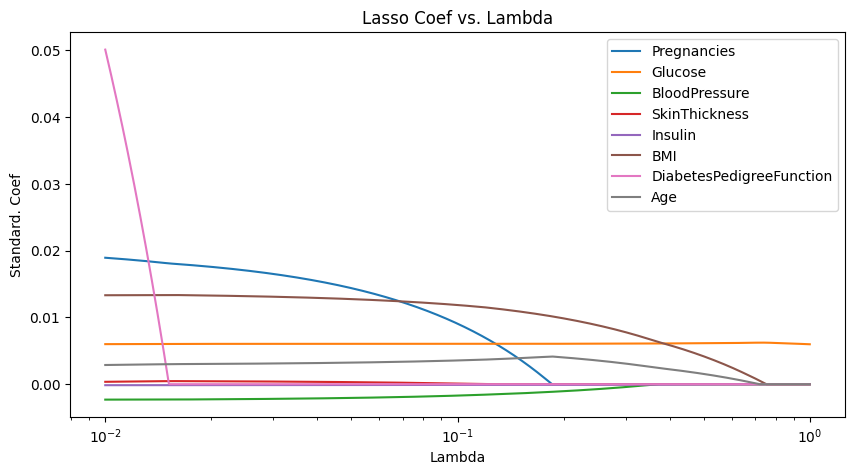

In [64]:
# Plot
plt.figure(figsize=(10, 5))
ax = plt.gca()
for idx, column_name in enumerate(df.columns[:8]):
    ax.plot(alphas, [coef[idx] for coef in coef_collect], label=column_name)
ax.set_xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Standard. Coef')
plt.legend()
plt.title('Lasso Coef vs. Lambda')
plt.show()

#### Standardize

In [46]:
# Parameters
alphas = np.linspace(0.01,1,10000)

In [47]:
# Standardize
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

In [66]:
# Collect coefficients
coef_collect = []
for alpha in tqdm(alphas, desc='Alpha'):
    model = Lasso(alpha=alpha).fit(X_stand, y)
    coef_collect.append(model.coef_)

Alpha:   0%|          | 0/10000 [00:00<?, ?it/s]

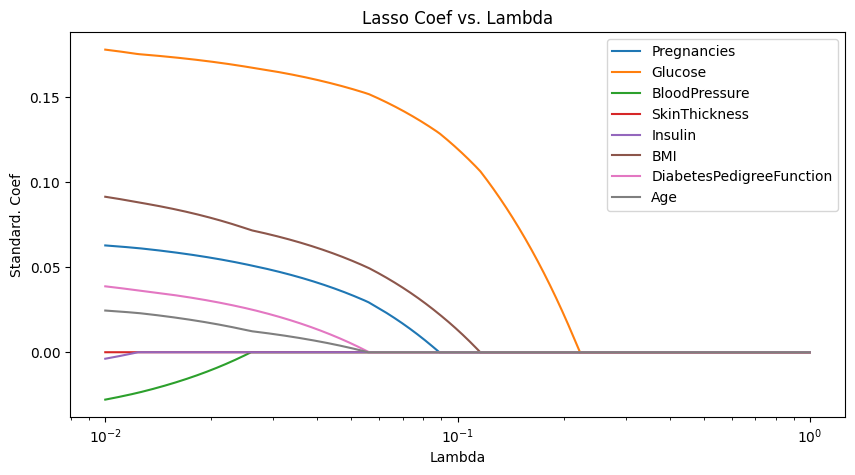

In [67]:
# Plot
plt.figure(figsize=(10, 5))
ax = plt.gca()
for idx, column_name in enumerate(df.columns[:8]):
    ax.plot(alphas, [coef[idx] for coef in coef_collect], label=column_name)
ax.set_xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Standard. Coef')
plt.legend()
plt.title('Lasso Coef vs. Lambda')
plt.show()

#### Explanation

In [55]:
df[df.columns[:8]].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


1) The coefficient paths when the variables are not standardized do not follow the principle that as $\lambda$ goes to infinity, the coefficients shrink to 0. Rather, we observe that Glucose's coefficient experiences a rather straight line. As shown in the described table above Glucose has the largest mean. This means that compared to other features, Glucose has the largest scale and range. This could significantly impact Lasso, as it unintentionally treats Glucose as "cheaper". In other words, small changes of $\beta_{Glucose}$ result in large changes of $\text{Glucose} \times \beta_{Glucose}$ compared to other features. Hence, the algorithm may find it better to shrink other coefficients first. However, when we do standardize the features to the same unit space, we see that as $\lambda$ goes to infinity, the coefficients shrink to 0.
2) As $\lambda$ goes to infinity, we see that SkinThickness starts from 0. Indicating that the model believes that SkinThickness has no explanatory power for Diabetes. Insulin, BloodPressure, Age, and DiabetesPedigreeFunction all shrink to 0 relatively quickly afterwards in that respective order. Pregnancies, BMI, and Glucose are that remaining features where their coefficients shrink to 0 in that order. This indicates that Pregnancies, BMI, and Glucose have the POTENTIAL for strong explanatory power for Diabetes according to the model (emphasis on POTENTIAL because we haven't officialy estimated risk yet). Glucose not shrinking makes sense when intrepreted from a medical professional's standpoint. For example, Glucose is directly related to Diabetes Metabolism. However, to further prove whether these variables truly hold predictive power, the model should be fitted in sample and then used to predict Diabetes out of sample and observe the evaluation metric (i.e., $R^2$).  

### 1.2: Select, estimate, and predict 

The true model is linear, and only a subset $S \subset \{0,1,\ldots, 49\}$ of the 50 variables have non-zero coefficients $\beta_j$. In this problem you should make three estimates: 

1. An estimate $\hat S$ of $S$
2. An estimate $\hat \beta_j$ for each $j\in \hat S$
3. An estimate of the predictive risk ${\mathbb E}(Y - X\hat\beta)^2$


We are not specifying how you should construct these estimates. You should use your judgement, taste, and 
the tools provided from class. However, you must clearly explain and justify whatever approach that you use.


#### Step 1) Create Features

In [176]:
# Copy
df_features = df[df.columns[:8]].copy(deep=True)

In [179]:
# Basic transformations
df_features['log_Glucose'] = np.log(df_features['Glucose'] + 1)
df_features['log_Insulin'] = np.log(df_features['Insulin'] + 1)
df_features['log_BMI'] = np.log(df_features['BMI'] + 1)
df_features['log_Age'] = np.log(df_features['Age'] + 1)
df_features['log_SkinThickness'] = np.log(df_features['SkinThickness'] + 1)
df_features['log_Pregnancies'] = np.log(df_features['Pregnancies'] + 1)
df_features['log_DiabetesPedigreeFunction'] = np.log(df_features['DiabetesPedigreeFunction'] + 1)

# Polynomial features
df_features['Glucose^2'] = df_features['Glucose'] ** 2
df_features['BloodPressure^2'] = df_features['BloodPressure'] ** 2
df_features['BMI^2'] = df_features['BMI'] ** 2
df_features['Age^2'] = df_features['Age'] ** 2

# Interaction features
df_features['Glucose*Insulin'] = df_features['Glucose'] * df_features['Insulin']
df_features['Glucose*BMI'] = df_features['Glucose'] * df_features['BMI']
df_features['Glucose*Age'] = df_features['Glucose'] * df_features['Age']
df_features['BloodPressure*Age'] = df_features['BloodPressure'] * df_features['Age']
df_features['SkinThickness*Insulin'] = df_features['SkinThickness'] * df_features['Insulin']

# Mix of transformations
for i in range(1, 4):
    df_features[f'Glucose^{i}'] = df_features['Glucose'] ** i
    df_features[f'BMI^{i}'] = df_features['BMI'] ** i
    df_features[f'Age^{i}'] = df_features['Age'] ** i
    df_features[f'BloodPressure^{i}'] = df_features['BloodPressure'] ** i
    df_features[f'DiabetesPedigreeFunction^{i}'] = df_features['DiabetesPedigreeFunction'] ** i
for i in range(1, 4):
    df_features[f'log_Glucose^{i}'] = df_features['log_Glucose'] ** i
    df_features[f'log_Insulin^{i}'] = df_features['log_Insulin'] ** i
    df_features[f'log_BMI^{i}'] = df_features['log_BMI'] ** i
    df_features[f'log_Age^{i}'] = df_features['log_Age'] ** i
    df_features[f'log_SkinThickness^{i}'] = df_features['log_SkinThickness'] ** i

In [180]:
# Check if 50 features
df_features.shape

(768, 50)

In [181]:
# Standardize
df_features = (df_features - df_features.mean()) / df_features.std()

#### Step 2) Set up LOOCV

Since we are not given a test dataset, we can only estimate risk. Hence, following practices in class, we will use LOOCV to estimate risk. 

In [182]:
# Calculate LOOCV Risk
def loocv_risk(coef, y_hat, y):
    n = len(y)
    RSS = np.sum((y - y_hat)**2)
    s = np.sum(coef != 0)
    return (1 / n) * (RSS / (1 - (s/n))**2)

#### Step 3) Train Model on All Features (LOOCV)

In [183]:
# Parameters
alphas = np.linspace(0.01,1,10000)

In [184]:
# Collect coefficients
coef_collect = []
loocv_collect = []
for alpha in tqdm(alphas, desc='Alpha'):
    # Fit model
    model = Lasso(alpha=alpha).fit(df_features.values, y)
    coef = model.coef_
    
    # Predict
    y_hat = model.predict(df_features.values)
    
    # Estimate Risk
    loocv_alpha = loocv_risk(coef=coef, y_hat=y_hat, y=y)
               
    # Collect
    coef_collect.append(model.coef_)
    loocv_collect.append(loocv_alpha)

Alpha:   0%|          | 0/10000 [00:00<?, ?it/s]

In [185]:
# Create dataframe
result = pd.DataFrame(coef_collect, columns=df_features.columns).assign(alpha=alphas, loocv_risk=loocv_collect)
result = result.set_index('alpha')

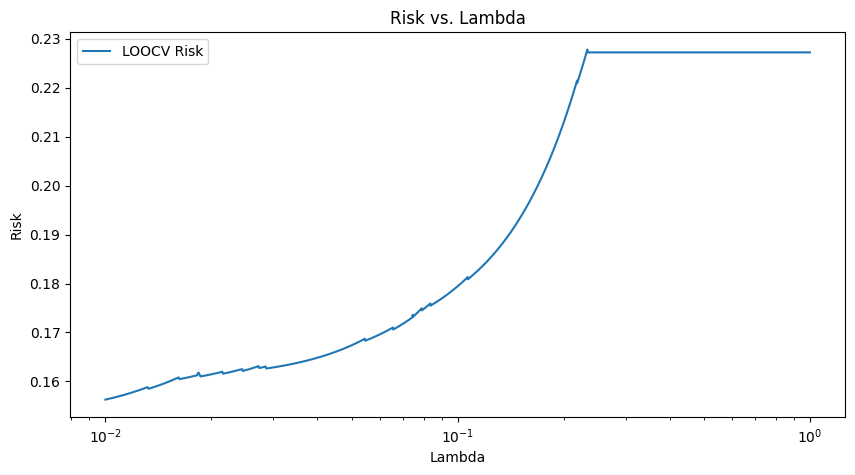

In [186]:
# Plot Risk
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(result[['loocv_risk']], label='LOOCV Risk')
ax.set_xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Risk')
plt.legend()
plt.title('Risk vs. Lambda')
plt.show()

In [188]:
# Display lambda with minimum risk
min_risk_row = result.loc[result.loocv_risk == result.loocv_risk.min()]
min_risk_row

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,log_Glucose,log_Insulin,...,log_BMI^2,log_Age^2,log_SkinThickness^2,log_Glucose^3,log_Insulin^3,log_BMI^3,log_Age^3,log_SkinThickness^3,log_DiabetesPedigreeFunction,loocv_risk
alpha,,,,,,,,,,,,,,,,,,,,,
0.01,0.043637,0.0,-0.000065,-0.0,-0.0,0.0,0.0,0.0,-0.000002,-0.000355,...,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.047628,0.156292


In [204]:
# Display S^
non_zero_columns = min_risk_row.loc[:, (min_risk_row != 0).any(axis=0)].columns.tolist()[:-1]
print(non_zero_columns)

['Pregnancies', 'BloodPressure', 'log_Glucose', 'log_Insulin', 'log_Age', 'Glucose^2', 'BMI^2', 'Glucose*BMI', 'BloodPressure^1', 'Age^3', 'DiabetesPedigreeFunction^3', 'log_Glucose^1', 'log_Insulin^1', 'log_DiabetesPedigreeFunction']


The plot displays how LOOCV risk evolves as $\lambda$ increases. Here we see our estimated LOOCV risk is lowest (or at minimum) when all features have 0 coefficient except for the columns displayed right above. Hence, this means that this list of columns is our $\hat{S}$. We will now refit the model on only Glucose with no $\lambda=0$

#### Step 4) Train Model on $\hat{S}$ (LOOCV)

In [220]:
# Collect coefficients
best_features = df_features[non_zero_columns]

# Fit model
model = Lasso(alpha=0).fit(best_features.values, y)
coef = model.coef_
coef_df = pd.DataFrame(coef.T).T
coef_df.columns = non_zero_columns

# Predict
y_hat = model.predict(best_features)

# Estimate Risk
loocv_est = loocv_risk(coef=coef, y_hat=y_hat, y=y)

# Display Estimated Beta and Estimated Risk
print(f"Estimated Predictive Risk: {loocv_est}\n")
print(f"Estimated Beta:")
display(coef_df)
print(coef_df.values)

Estimated Predictive Risk: 0.1528167270301373

Estimated Beta:


,Pregnancies,BloodPressure,log_Glucose,log_Insulin,log_Age,Glucose^2,BMI^2,Glucose*BMI,BloodPressure^1,Age^3,DiabetesPedigreeFunction^3,log_Glucose^1,log_Insulin^1,log_DiabetesPedigreeFunction
0,0.033734,0.067249,0.10529,-0.024456,0.186879,0.199994,0.067501,0.039985,-0.110068,-0.148765,-0.047658,-0.153894,-0.000938,0.080797


[[ 0.03373398  0.06724852  0.10529013 -0.02445582  0.18687943  0.19999436
   0.06750054  0.03998508 -0.11006779 -0.14876545 -0.04765849 -0.15389422
  -0.00093779  0.08079699]]


Hence, $\hat{\beta}$ is above and ${\mathbb E}(Y - X\hat\beta)^2$ = 0.15.

### Problem 2: Risky business (10 points)

In class [(and in these notes)](https://github.com/YData123/sds365-fa22/raw/main/notes/kernel-bias-variance.pdf) we sketched a proof that, when the regression function has two bounded derivatives,
 the bias and variance for kernel smoothing scale as

$$ \mbox{bias}^2 = O\left(h^4\right)$$
$$ \mbox{var} = O\left(\frac{1}{nh^p}\right).$$

Here $h$ is the bandwidth parameter, $n$ is the sample size, and $p$ is the number of predictor variables. These expressions are asymptotic, meaning that they apply as $n$ gets large and $h$ gets small.  In this problem your job is to reason about the implications of this bias-variance decomposition for prediction.

*Note:* For this problem, you may either enter your answers in Markdown using $\rm\LaTeX$, or you write them on paper and scan to insert as an image in the notebook; whichever you prefer.


### 2.1 Selecting the optimal bandwidth

Suppose that the bias and variance are such that 

$$ \mbox{bias}^2(\hat m(x))  \leq c_1 h^4 $$
$$ \mbox{var}(\hat m(x)) \leq c_2 \frac{1}{nh^p}.$$

for two constants $c_1$ and $c_2$. Using these expressions and a little calculus, determine the optimal bandwidth $h$ to minimize the risk function 

$$R(h) = {\mathbb E}\left(\hat m(x) - m(x)\right)^2.$$

Your answer should involve the constants $c_1, c_2$, and $n$ and $p$. Give a bound on the resulting risk using this bandwidth.


### 2.2 Bandwith selection without tears

Now, going back to the expressions $\mbox{bias}^2 = O\left(h^4\right)$ and $ \mbox{var} = O\left(\displaystyle\frac{1}{nh^p}\right)$, explain why the scaling of the optimal bandwidth (as a function of $n$ and $p$), must satisfy 
$\mbox{bias}^2  \approx \mbox{var}$; that is, they must be of the same order as $h\to 0$. Then, without using any calculus, use this argument to determine the optimal scaling of the bandwidth and the fastest rate at which the 
risk $R(h) = {\mathbb E}\left(\hat m(x) - m(x)\right)^2$ can approach zero as the sample size increases.


### 2.3 The cursed COD

Using the risk bound you derive above, make a plot that demonstrates the curse of dimensionality by plotting the sample size required to achieve a given level of risk. Specifically, let the target risk $R$ vary between 0.1 and 0.5, and let the dimension $p$ vary between 1 and 20, and plot the sample size required to achieve that risk. Give a single plot that shows the collection of curves for each dimension.




1) We can write:
\begin{align}
    R(h) &= {\mathbb E}\left(\hat m(x) - m(x)\right)^2 \\
    &= \text{bias}^2(\hat{m}(x)) + var(\hat{m}(x) \\
    &\leq c_1h^4 + c_2\frac{1}{nh^p}
\end{align}
Taking the derivative w.r.t to $h$ and solving for $h$:
\begin{align}
    \frac{dR(h)}{dh} &= 4c_1h^3 - c_2\frac{p}{n}\frac{1}{h^{(p+1)}} = 0 \\ 
    4c_1h^3 &= \frac{c_2p}{n}\frac{1}{h^{(p+1)}} \\
    h^3h^{(p+1)} &= \frac{c_2p}{4c_1n} \\
    h^{(p+4)} &= \frac{c_2p}{4c_1n} \\
    h^* &= \left(\frac{c_2p}{4c_1n}\right)^{\frac{1}{p+4}}
\end{align}
Substituting this into $R(h)$:
\begin{align}
R(h^*) &\leq c_1 \left(\frac{c_2 p}{4c_1 n}\right)^{\frac{4}{p+4}} + c_2 \frac{1}{n}\left(\frac{c_2 p}{4c_1 n}\right)^{\frac{-p}{p+4}} \text{         }\square
\end{align}

2) From 1) we showed that $R(h)$ can be decomposed into the $bias-variance$ tradeoff. The function $R(h)$ is minimized when its derivative w.r.t to $h$ is set to 0. This leads to the fact that the derivative of $\text{bias}^2(h)$ must equal to the dervative of $\text{var}(h)$ w.r.t. to $h$. In other words, $4c_1h^3 = c_2\frac{p}{n}\frac{1}{h^{(p+1)}}$. This balance implies that an increase in the $\text{bias}^2(h)$ due to a small increase in $h$ is offset by a corresponding decrease in $\text{var}(h)$, and vice versa. The definition of a derivative is $\lim_{h \to 0} \frac{\text{bias}^2(h^*+h) - \text{bias}^2(h)}{h}$, where $h^*$ is from 1). Hence, at at an infinitesimally small level, the scaling effects of $h \to 0$ on $\text{bias}^2(h)$ and $\text{var}(h)$ must be $\text{bias}^2  \approx \text{var}$ in order for $R(h)$ to be minimized by the definition of a derivative. Thus, we can determine $h$:
\begin{align}
    h^4 &= \frac{1}{nh^p} \\
    h^{4+p} &= \frac{1}{n} \\
    h &= (\frac{1}{n})^{\frac{1}{4+p}}
\end{align}
Hence, as $n \to \infty$, $\text{bias}^2(h) = n^{-\frac{4}{4+p}} = \text{var}(h)$. So the fastest rate at which $R(h)$ decreases is $n^{-\frac{4}{4+p}}$. This signifies that in order to reduce $R(h)$, we must significantly increase n as p increases, highlighting the COD.


In [239]:
# We will use the risk bound derived in 1). For easy intrepretation, we will set the constants c_1 and c_2 to 1
# Constants
c1 = 1
c2 = 1

# Target risks and dimensions
target_risks = np.linspace(0.1, 0.5, 5)
dimensions = range(1, 21)

In [240]:
# Sample size to achieve desired level of risk with dimension p
def calc_sample_size(target_risk, p):
    n = 1
    while True:
        risk_calc = c1 * ((c2 * p / (4 * c1 * n)) ** (4 / (p + 4))) + c2 * (1 / n) * ((c2 * p / (4 * c1 * n)) ** (-p / (p + 4)))
        if risk_calc <= target_risk:
            return n
        n += 1

Dimension:   0%|          | 0/20 [00:00<?, ?it/s]

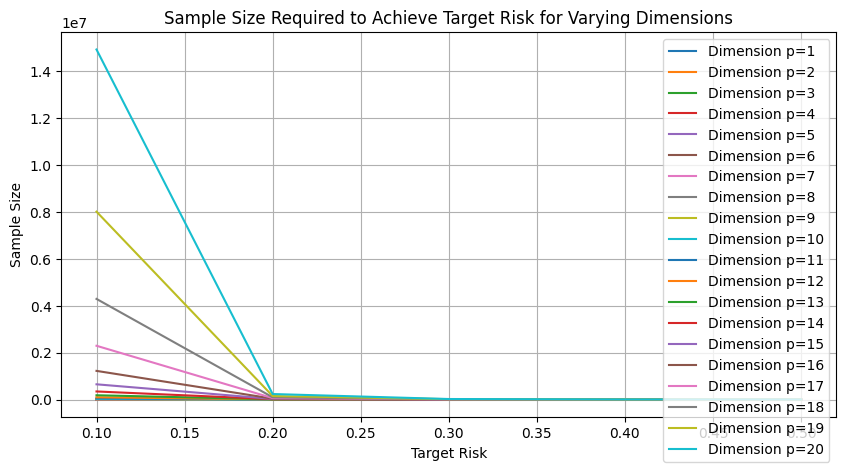

In [243]:
# Plot
plt.figure(figsize=(10, 5))
for p in tqdm(dimensions, desc='Dimension'):
    sample_sizes = [calc_sample_size(risk, p) for risk in target_risks]
    plt.plot(target_risks, sample_sizes, label=f'Dimension p={p}')
plt.xlabel('Target Risk')
plt.ylabel('Sample Size')
plt.title('Sample Size Required to Achieve Target Risk for Varying Dimensions')
plt.legend()
plt.grid(True)
plt.show()

### Problem 3: A kernel of truth (15 points)

For problem you will implement nonparametric regression using Mercer kernels and penalization, in 1-dimension. This can be compared to regression using smoothing kernels. 

As discussed in lecture, nonparametric regression with Mercer kernels is based on the infinite dimensional ridge regression

$$ \hat m = \mbox{argmin} \| Y - m \|^2 + \lambda \|m\|_K^2$$

By the representer theorem, this is equivalent to setting $\hat m(x) = \sum_{i=1}^n \hat \alpha_i K(X_i, x)$ and 
using the finite dimensional optimization

$$ \hat \alpha = \mbox{argmin} \| Y - {\mathbb K} \alpha \|^2 + \lambda \alpha^T {\mathbb K} \alpha$$

###  3.1 Solve 

Derive a closed-form expression for the minimizer $\hat\alpha$. Show all of the steps in your derivation, 
and justify each step. (As above, you may either enter your answers in Markdown using $\rm\LaTeX$, or insert an image of your handwritten solution.)


1) Expanding $R(a)$:
\begin{align}
    R(a) &= \|Y - {\mathbb K}\alpha\|^2 + \lambda \alpha^T {\mathbb K} \alpha\\
    &= (Y - {\mathbb K}\alpha)^T(Y - {\mathbb K}\alpha) + \lambda \alpha^T {\mathbb K} \alpha\\
    &= (Y^T - \alpha^T{\mathbb K}^T)(Y - {\mathbb K}\alpha) + \lambda \alpha^T {\mathbb K} \alpha\\
    &= Y^TY - Y^T{\mathbb K}\alpha - \alpha^T{\mathbb K}^TY + \alpha^T{\mathbb K}^T{\mathbb K}\alpha + \lambda \alpha^T {\mathbb K} \alpha\\
    &=> \text{We know that $\mathbb K$ is positive-semidefinite and symmetric} \\ 
    &=> \text{Hence, } Y^T{\mathbb K}\alpha = \alpha^T{\mathbb K}^TY \text{. Thus, we have}\\
    &= Y^TY - 2\alpha^T{\mathbb K}Y + \alpha^T{\mathbb K}^2\alpha + \lambda \alpha^T {\mathbb K} \alpha\\
\end{align} 
Taking the derivative w.r.t. $a$ and setting it equal to 0:
\begin{align}
    \frac{dR(a)}{da} &= -2{\mathbb K}Y + 2{\mathbb K}^2\alpha + 2\lambda{\mathbb K}\alpha = 0\\
    -2{\mathbb K}^{-1}{\mathbb K}Y + 2{\mathbb K}^{-1}{\mathbb K}^2\alpha + 2\lambda{\mathbb K}^{-1}{\mathbb K}\alpha &= {\mathbb K}^{-1}0 \\
    ({\mathbb K} + \lambda \cdot I)\alpha &= Y\\
    \hat{\alpha} &= ({\mathbb K} + \lambda \cdot I)^{-1}Y \text{         }\square
\end{align} 

###  3.2 Implement

Next you will use your solution above and implement Mercer kernel regression. We give some starter code.

In [249]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep

The following cell defines some "helper functions" for this exercise. You don't need to change any of this code.
(If you do want to make changes, just describe what you did and why.)

In [268]:
def plot_estimate(x, f, fhat, X, y, sigma, lmbda, sleeptime=.01):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.plot(x, f, color='red', linewidth=2, label='true function')
    plt.plot(x, fhat, color='blue', linewidth=2, label='estimated function')
    plt.scatter(X, y, color='black', alpha=.5, label='random sample')
    plt.ylim(np.min(f)-4*sigma, np.max(f)+4*sigma)
    plt.legend(loc='upper left')
    plt.title('lambda: %.3g' % lmbda)
    plt.xlabel('x')
    plt.ylabel('estimated m(x)')
    plt.show()
    sleep(sleeptime)
    
def true_fn(x):
    return 3*x**2

def run_simulation(kernel, lmbdas, show_bias_variance=True):
    min_x, max_x = -1, 1
    x = np.linspace(min_x, max_x, 100)
    f = true_fn(x)
    sigma = .25
    estimates = []
    trials = 500
    
    for lmbda in lmbdas:
        estimates_lambda = []
        for i in np.arange(trials):
            X = np.sort(np.random.uniform(low=min_x, high=max_x, size=50))
            fX = true_fn(X)
            y = fX + sigma*np.random.normal(size=len(X))
            fhat = mercer_kernel_regress(kernel, X, y, x, lmbda=lmbda)
            if i % 50 == 0:
                plot_estimate(x, f, fhat, X, y, sigma, lmbda)
            estimates_lambda.append(fhat)
        estimates.append(estimates_lambda)

    if show_bias_variance == False:
        return
    
    fhat = np.array(estimates)
    sq_bias = np.zeros(len(lmbdas))
    variance = np.zeros(len(lmbdas))

    for i in np.arange(len(lmbdas)):
        sq_bias[i] = np.mean((np.mean(fhat[i], axis=0) - f)**2)
        variance[i] = np.mean(np.var(fhat[i], axis=0))
    
    plt.figure(figsize=(10,6))
    plt.plot(lmbdas, sq_bias, label='squared bias', linewidth=2)
    plt.plot(lmbdas, variance, label='variance', linewidth=2)
    plt.plot(lmbdas, sq_bias + variance, label='risk')
    plt.legend()
    plt.show()
 

Your job is to implement Mercer kernel regression and run it on two 
different kernel functions. The two kernels could simply be the Gaussian kernel
with two different bandwidths, or you might experiment with other kernels.

The function `mercer_kernel_regress` takes a kernel, training data `X` and `y`, an array of values `x` to evaluate the function on, and a regularization parameter. You'll use your derivation above to 
determine the coefficients $\alpha$. For some clues and suggestions on how to do the 
implementation, see our demo code for smoothing kernels. You need to do something very similar.


In [269]:
# Mercer Kernel Regression
def mercer_kernel_regress(kernel, X, y, x, lmbda): 
    # Number of training samples 
    n = len(X)
    
    # Create K (nxn matrix)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(X[i], X[j])
    
    # Compute alpha
    alpha = np.linalg.inv(K + lmbda * np.eye(n)) @ y
    
    # Compute estimated function values
    fhat = np.zeros(len(x))
    for i in range(len(x)):
        fhat[i] = sum(alpha[j] * kernel(X[j], x[i]) for j in range(n))
    return fhat

# Guassian Kernel (Mercer)
def kernel1(x, y, bandwidth=1):
    return np.exp(-((x - y) ** 2) / (2 * bandwidth ** 2))

 
# Triangular Kernel (Mercer)
def kernel2(x, y, bandwidth=1):
    return np.maximum(0, 1 - np.abs(x - y) / bandwidth)

###  3.3 Run two simulations and select regularization parameters

Finally, using our starter code and your own implementation above, run two simulations, one 
using `kernel1` and the other using `kernel2`. After each simulation, select a regularization level from the bias-variance tradeoff, and then run a final simulation with that regularization level. In the following 
starter code, you only need to specify the sequence of regularization parameters.


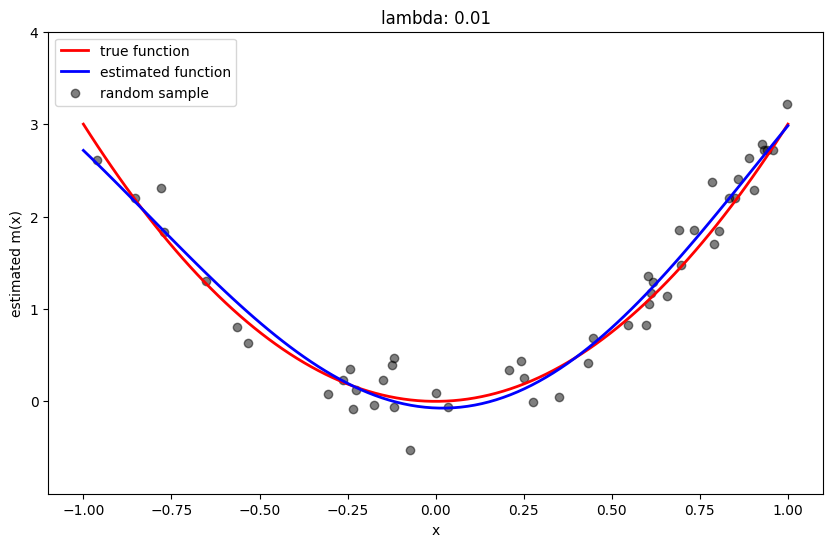

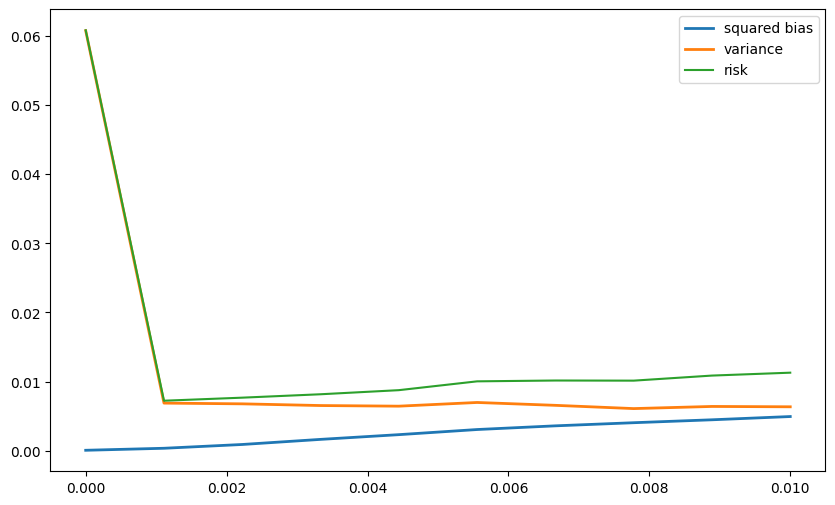

In [274]:
lmbdas = np.linspace(1e-10,0.01,10)
run_simulation(kernel1, lmbdas) 

In [275]:
# From the graph the 2th point achieves the minimum risk
lmbdas

array([1.0000000e-10, 1.1111112e-03, 2.2222223e-03, 3.3333334e-03,
       4.4444445e-03, 5.5555556e-03, 6.6666667e-03, 7.7777778e-03,
       8.8888889e-03, 1.0000000e-02])

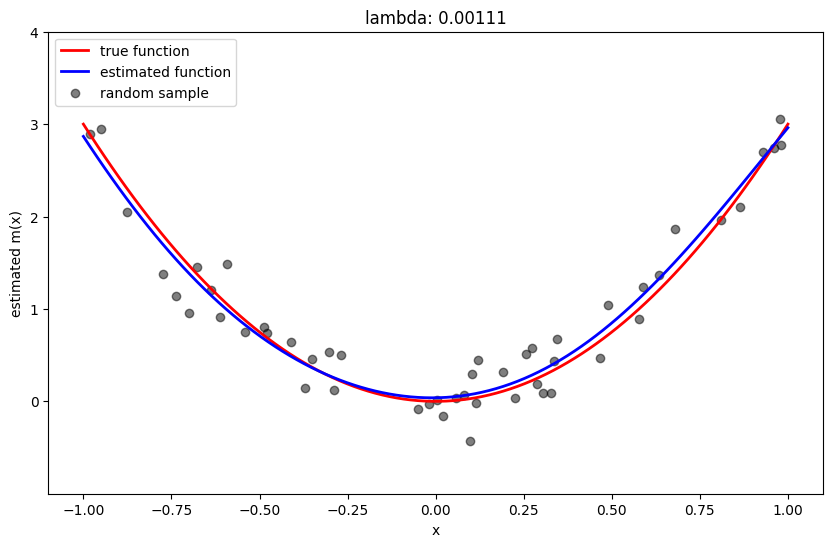

In [277]:
lambda_hat = 1.1111112e-03
run_simulation(kernel1, [lambda_hat], show_bias_variance=False)

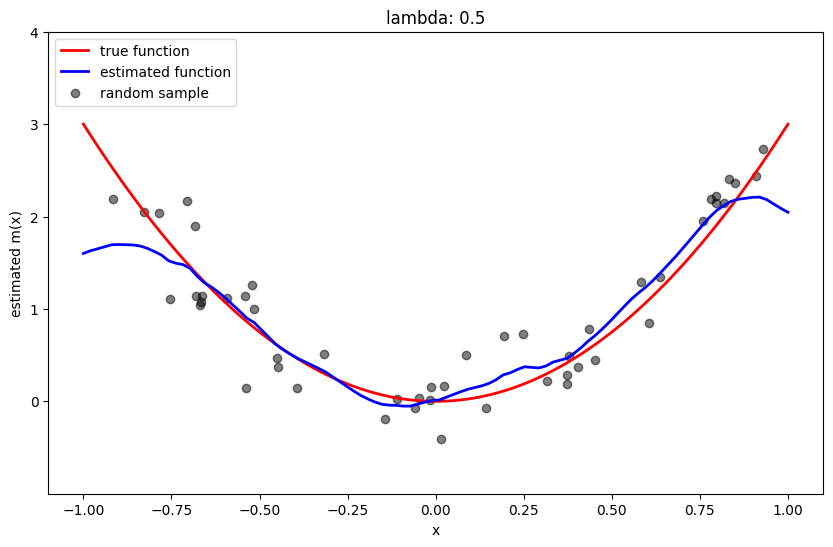

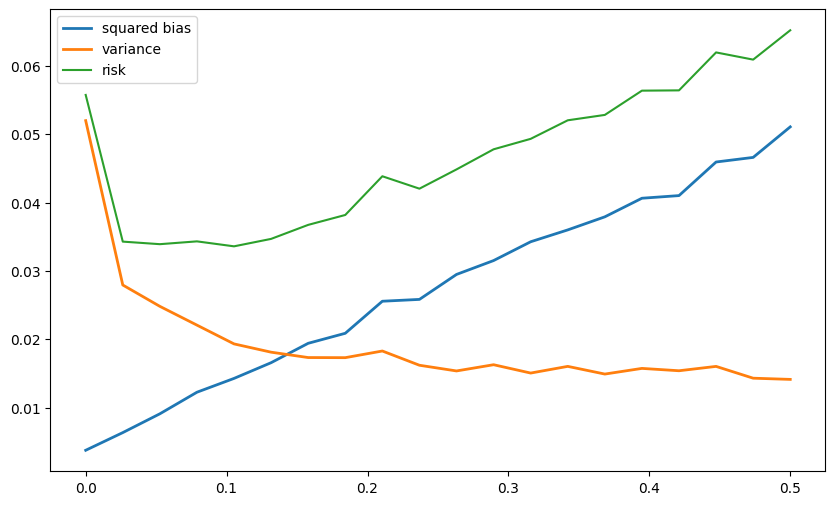

In [280]:
lmbdas = np.linspace(1e-5,0.5,20)
run_simulation(kernel2, lmbdas)

In [283]:
# From the graph the 5th point achieves the minimum risk
lmbdas

array([1.00000000e-05, 2.63252632e-02, 5.26405263e-02, 7.89557895e-02,
       1.05271053e-01, 1.31586316e-01, 1.57901579e-01, 1.84216842e-01,
       2.10532105e-01, 2.36847368e-01, 2.63162632e-01, 2.89477895e-01,
       3.15793158e-01, 3.42108421e-01, 3.68423684e-01, 3.94738947e-01,
       4.21054211e-01, 4.47369474e-01, 4.73684737e-01, 5.00000000e-01])

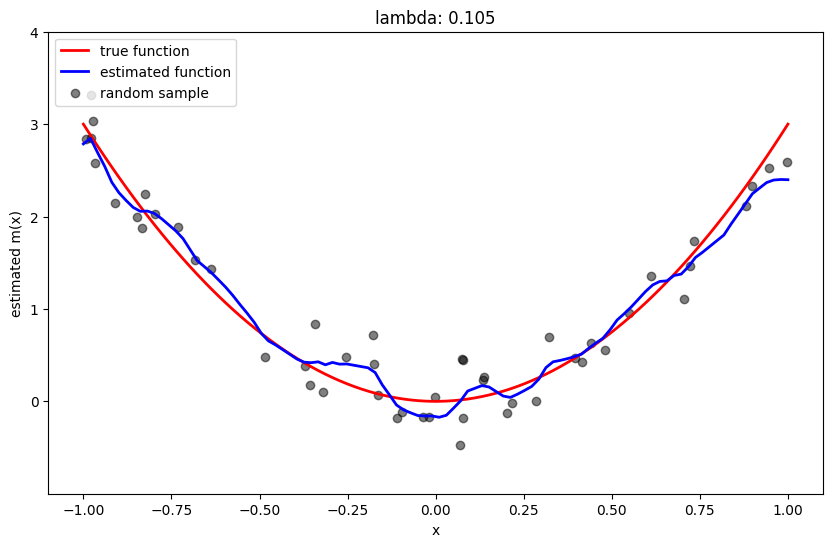

In [284]:
lambda_hat = 1.05271053e-01
run_simulation(kernel2, [lambda_hat], show_bias_variance=False)

### Problem 4: An algebraic simplification of LOOCV (15 points)

Leave-One-Out Cross Validation (LOOCV) is a specific type of 
$K$-fold cross validation where $K$ equals the number of observations in the dataset. 
It works as follows for a training set with $n$ observations:

1. A single observation is used as the validation set, 
    and the remaining $n-1$ observations serve as the training set.
2. A model is trained on the $n-1$ observations and 
    validated on the single left-out observation.
3. This process is repeated $n$ times, each time leaving out a different 
    observation as the validation set.
4. The LOOCV error is then the average error across all $n$ trials.

LOOCV is particularly useful because:
- It utilizes almost all the data for training, 
    so it's less prone to high variance compared to other validation schemes.
- Since each observation is tested exactly once, 
    LOOCV provides a very thorough out-of-sample testing mechanism.

However, it can be computationally expensive because you have to fit the model $n$ times. 
    Luckily, for some models, there are algebraic simplifications available 
    that make it computationally efficient.
    Expressing LOOCV in terms of the hat matrix allows for efficient 
    computation of the LOOCV error without the need to refit the model for 
    each left-out observation, making it a valuable tool for model evaluation.

Recall that the LOOCV error can be expressed as:

$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_{-i} \right)^2, $$

where $\hat{y}_{-i}$ represents the prediction for the $i^{th}$ observation 
when it's left out from the training process.
In the following questions, you will be deriving an alternative expression 
of the LOOCV error for both kernel and ridge regression, following the hints below.

### 1. LOOCV for kernel smoothing:

For kernels, we know that the LOOCV error can be equivalently written as the following form:

$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i - \hat y_i}{1 - L_{ii}} \right)^2, $$
where $\hat y_i$ is the predicted value from the model fit on all data, and 
$L_{ii}$ is the $i^{th}$ diagonal element of the hat matrix $L$.

For kernel regression, we have
$$ \hat{y} = L y, $$
where
- $ \hat{y} $ is the vector of predictions.
- $ y $ is the observed response values.
- $ L $ is the hat matrix and is defined by the kernel (for a given bandwidth).
So, each diagonal element $ L_{ii} $ of the matrix $ L $ is defined as:
$$ L_{ii} = \frac{K\left(x_i, x_i\right)}{\sum_{j=1}^{n} K\left(x_i, x_j\right)}, $$
where
- $ K $ is the kernel function.
- $ x_i $ and $ x_j $ are the predictor values for observations $ i $ and $ j $, respectively.

The diagonal elements $ L_{ii} $ give the "leverage" of each observation, which can be interpreted as the influence an observation has on its own prediction. 

Derive this alternative expression of the LOOCV error for kernel regression. That's to say, for kernel regression, prove that

$$ y_i - \hat{y}_{-i}  =  \frac{y_i - \hat y_i}{1 - L_{ii}}$$

1) Defining:
\begin{align}
    \hat{y}_i &= \frac{\sum_{j=1}^n K(x_i, x_j)y_i}{\sum_{j=1}^n K(x_i, x_j)} = \sum_{j=1}^n W_{ij} y_j\\
    \hat{y}_{-i} &= \frac{\sum_{j\not=i} K(x_i, x_j)y_i}{\sum_{j\not=i} K(x_i, x_j)} = \sum_{j\not=i}^n W_{-i\text{, }ij} y_j\\
    S &= {\sum_{j=1}^n K(x_i, x_j)} \\
    W_{ii} &= \frac{K(x_i, x_i)}{S} = L_{ii} \text{ (By Definition)}\\
    W_{ij} &= \frac{K(x_i, x_j)}{S}
\end{align}
Wishing to find a relation between weights and utilizing substitution with the defined variables:
\begin{align}
    W_{-i\text{, }ij} &= \frac{K(x_i, x_j)}{\sum_{j\not=i} K(x_i, x_j)} = \frac{K(x_i, x_j)}{\sum_{j=1}^n K(x_i, x_j) - K(x_i, x_i)} \\
    &= \frac{SW_{ij}}{S - SW_{ii}} \\
    &= \frac{W_{ij}}{1-W_{ii}}
\end{align}
Revaluating $\hat{y}_{-i}$:
\begin{align}
    \hat{y}_{-i} &= \sum_{j\not=i}^n W_{-i\text{, }ij} y_j = \sum_{j\not=i}^n\frac{W_{ij}}{1-W_{ii}}y_i = \frac{1}{1-W_{ii}}\sum_{j\not=i}^nW_{ij}y_i \text{ (Notice that $W_{ii}$ is constant across the summations because $j\not=i$, hence it is a scalar)}\\
\end{align}
Noticing that:
\begin{align}
    \hat{y}_i &= W_{ii}y_i + \sum_{j\not=i}^n W_{ij} y_j \\
    \sum_{j\not=i}^n W_{ij} y_j &= \hat{y}_i - W_{ii}y_i
\end{align}
Revaluating $\hat{y}_{-i}$:
\begin{align}
    \hat{y}_{-i} &= \frac{\hat{y}_i - W_{ii}y_i}{1-W_{ii}} \\
    y_i - \hat{y}_{-i} &= y_i - \frac{\hat{y}_i - L_{ii}y_i}{1-L_{ii}} \\
    &= \frac{y_i - L_{ii}y_i - \hat{y}_i + L_{ii}y_i}{1-L_{ii}} \\
    &= \frac{y_i - \hat{y}_i}{1-L_{ii}} \text{         }\square
\end{align}

### 2. LOOCV for ridge regression:

Recall that for ridge regression, the prediction equation can be written as:

$$ \hat{y} = X(X^T X + \lambda I)^{-1}X^T y, $$

where:
- $X$ is the design matrix, and each row $x_i$ represents the $i^{th}$ observation, such that $X=\left[\begin{array}{c}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{array}\right]$
- $y$ is the response vector.
- $\lambda$ is the ridge parameter.
- $I$ is an identity matrix.

As in the kernel smoothing case, the LOOCV can be written as:
$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i-\hat y_i}{1 - H_{ii}} \right)^2, $$
where the hat matrix is

$$ H = X(X^T X + \lambda I)^{-1} X^T $$

In the following steps, we will derive this alternative expression of the LOOCV error for ridge regression.


2.1 Using the [Sherman-Morrison
formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula), a special case of the [Woodbury matrix identity](https://en.wikipedia.org/wiki/Woodbury_matrix_identity):
$$
(A - uv^T)^{-1} = A^{-1} + \frac{A^{-1}uv^T A^{-1}}{1 - v^T A^{-1}u}.
$$

The design matrix when we leave out the $i^{th}$ observation is denoted as $X_{-i}$. Prove that 

$$ (X_{-i}^T X_{-i} + \lambda I)^{-1} = (X^T X + \lambda I)^{-1} + \frac{(X^T X + \lambda I)^{-1}x_i x_i^T (X^T X + \lambda I)^{-1}}{1 - x_i^T (X^T X + \lambda I)^{-1}x_i} $$

Hint: What's the relationship between $X_{-i}^T X_{-i}$ and $X^T X $?

1) Defining:
\begin{align}
    X_{-i}^TX_{-i} &= X^TX - x_ix_i^T \text{ (This is a nxn matrix, whereas $x_i^Tx_i$ is a scalar)}\\
    A &= X^TX + \lambda I \\
    u &= x_i\\
    v &= x_i^T \\
\end{align}
Applying Sherman-Morrison formula, it directly follows that:
\begin{align}
    (X_{-i}^T X_{-i} + \lambda I)^{-1} &= (A - uv^T) = A^{-1} + \frac{A^{-1}uv^T A^{-1}}{1 - v^T A^{-1}u} = A^{-1} + \frac{A^{-1} x_i x_i^T A^{-1}}{1 - x_i^T A^{-1}x_i} = \left[z\right] \text{(We will use $\left[z\right]$ in 2.2)}\\
    &= (X^T X + \lambda I)^{-1} + \frac{(X^T X + \lambda I)^{-1}x_i x_i^T (X^T X + \lambda I)^{-1}}{1 - x_i^T (X^T X + \lambda I)^{-1}x_i} \text{         }\square
\end{align}

2.2  Let $A = X^T X + \lambda I$. Using previous formulas,  prove that $\hat{\beta}_{-i}$, which is derived from $ \hat{y}_{-i} = x_i^T \hat{\beta}_{-i} $, can be expressed as:

\begin{align*}
    \hat{\beta}_{-i} & = A^{-1} X^T y-A^{-1} x_i y_i+\frac{A^{-1} x_i x_i^T A^{-1}}{1 - x_i^T A^{-1}x_i}\left(X^T y-x_i y_i\right)
\end{align*}


1) Defining:
\begin{align}
    \left[z\right] &= \text{Equation from 1.} \\
    X_{-i}^Ty_{-i} &= X^Ty - x_iy_i^T\\
    \hat{\beta}_{-i} &= (X_{-i}^T X_{-i} + \lambda I)^{-1}X_{-i}^Ty_{-i} = \left[z\right] (X^Ty - x_iy_i \text{ (This is a nx1 matrix => $[(n,1) \times (1,1)]$)})
\end{align}
Expanding, it directly follows that:
\begin{align}
    \hat{\beta}_{-i} &= (A^{-1} + \frac{A^{-1} x_i x_i^T A^{-1}}{1 - x_i^T A^{-1}x_i})(X^Ty - x_iy_i^T) \\
    &= A^{-1} X^T y-A^{-1} x_i y_i+\frac{A^{-1} x_i x_i^T A^{-1}}{1 - x_i^T A^{-1}x_i}\left(X^T y-x_i y_i\right) = \left[j\right] \text{(We will use $\left[j\right]$ in 2.3)} \text{         }\square
\end{align}

2.3 Note that the $i^{th}$ diagnoal element of $H$ satifies $H_{ii} = x_i^T A^{-1}x_i $.  Using previous formulas, prove that 


$$  \hat{\beta}_{-i} - \hat{\beta}  = \frac{A^{-1} x_i \left( \hat{y}_i - y_i\right)}{1 - H_{ii}}$$
Hint : What is $ A^{-1} X^T y$?



Defining:
\begin{align*}
    \left[j\right] & = \text{Equation from 2.} \\
    \hat{\beta} &= A^{-1} X^T y \\
    H_{ii} &= x_i^T A^{-1}x_i \\
    x_i^T \hat{\beta} &= \hat{y}_i
\end{align*}
Expanding, it directly follows that:
\begin{align*}
    \hat{\beta}_{-i} - \hat{\beta} & = \left[j\right] - A^{-1} X^T y\\
    &= A^{-1} X^T y-A^{-1} x_i y_i+\frac{A^{-1} x_i x_i^T A^{-1}}{1 - x_i^T A^{-1}x_i}\left(X^T y-x_i y_i\right) - A^{-1} X^T y \text{ ($Note: A^{-1} X^T y$ cancel out)} \\ 
    &= \frac{A^{-1} x_i x_i^T A^{-1}}{1 - H_{ii}}\left(X^T y-x_i y_i\right) -A^{-1} x_i y_i \\
    &= \frac{A^{-1} x_i x_i^T A^{-1}X^T y - A^{-1} x_i x_i^T A^{-1}x_i y_i}{1 - H_{ii}} -A^{-1} x_i y_i\\
    &= \frac{A^{-1} x_i x_i^T \hat{\beta} - A^{-1} x_i x_i^T A^{-1}x_i y_i}{1 - H_{ii}} - \frac{A^{-1} x_i y_i - x_i^T A^{-1}x_iA^{-1} x_i y_i}{1 - H_{ii}} \\
    &= \frac{A^{-1} x_i \hat{y}_i - A^{-1} x_i y_i}{1 - H_{ii}} - \frac{(x_i^T A^{-1}x_i)(A^{-1} x_i) y_i - (A^{-1} x_i)(x_i^T A^{-1}x_i) y_i}{1 - H_{ii}} \\
    &=> \text{Notice that $(x_i^T A^{-1}x_i)$ is a scalar, hence $(x_i^T A^{-1}x_i)(A^{-1} x_i) y_i = (A^{-1} x_i)(x_i^T A^{-1}x_i) y_i$} \\
    &= \frac{A^{-1} x_i \left( \hat{y}_i - y_i\right)}{1 - H_{ii}} \text{         }\square
\end{align*}

2.4 Finally, using previous formulas, prove that in the kernel smoothing case, the LOOCV can be written as:
$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i-\hat y_i}{1 - H_{ii}} \right)^2 $$
That's to say, prove that

$$ y_i - \hat{y}_{-i} = \frac{y_i-\hat y_i}{1 - H_{ii}} $$


Defining:
\begin{align}
    x_i^T\hat{\beta} &= \hat{y}_i \\
    x_i^T\hat{\beta}_{-i} &= \hat{y}_{-i} \\
    \hat{\beta}_{-i} &= \hat{\beta} + \frac{A^{-1} x_i \left( \hat{y}_i - y_i\right)}{1 - H_{ii}}
\end{align}
Expanding, it directly follows that:
\begin{align}
    x_i^T\hat{\beta}_{-i} &= x_i^T(\hat{\beta} + \frac{A^{-1} x_i \left( \hat{y}_i - y_i\right)}{1 - H_{ii}}) \\
    \hat{y}_{-i} &= \hat{y}_i + \frac{H_{ii} \left( \hat{y}_i - y_i\right)}{1 - H_{ii}} \\
    y_i - \hat{y}_{-i} &= y_i - \hat{y}_i + \frac{H_{ii} \left( \hat{y}_i - y_i\right)}{1 - H_{ii}} \\
    &= y_i - \frac{\hat{y}_i -\hat{y}_iH_{ii}}{1 - H_{ii}}  + \frac{H_{ii} \left( \hat{y}_i - y_i\right)}{1 - H_{ii}} \\
    &= y_i - \frac{\hat{y}_i - H_{ii}y_i}{1 - H_{ii}} \\ 
    &= \frac{y_i - H_{ii}y_i + \hat{y}_i + H_{ii}y_i}{1 - H_{ii}} \\ 
    &= \frac{y_i-\hat y_i}{1 - H_{ii}} \text{         }\square
\end{align}